In [1]:
import numpy as np
from PIL import Image
import h5py
import matplotlib.pyplot as plt

In [2]:
train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
train_set_x = np.array(train_dataset["train_set_x"])
train_set_y = np.array(train_dataset["train_set_y"])

test_dataset = h5py.File('datasets/test_catvnoncat.h5',"r")
test_set_x = np.array(test_dataset["test_set_x"])
test_set_y = np.array(test_dataset["test_set_y"])

classes = np.array(test_dataset["list_classes"])

test_set_y = test_set_y.reshape(1,test_set_y.shape[0])
train_set_y = train_set_y.reshape(1,train_set_y.shape[0])


cat


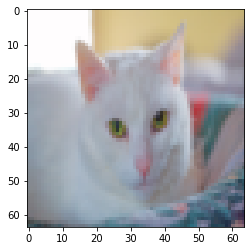

In [3]:
index = 2
print(classes[test_set_y[0][index]].decode("utf-8"))
show = plt.imshow(test_set_x[index])

In [4]:
train_set_x = train_set_x.reshape(train_set_x.shape[0],-1).T
test_set_x = test_set_x.reshape(test_set_x.shape[0],-1).T

train_set_x = train_set_x/255
test_set_x = test_set_x/255

In [5]:
def sigmoid(z):
    
    
    activation = 1/(1+np.exp(-z))
    
    return activation
    

In [6]:
def propagate(w,b,X,Y):
    
    m = X.shape[1]
    
    A = sigmoid(np.dot(w.T,X)+b)
    dz = A-Y
    
    dw = (1/m)*(np.dot(X,dz.T))
    db = (1/m)*(np.sum(dz))
    
    
    return dw, db

In [7]:
def optimize(w,b,X,Y,num_iteration,learning_rate):
    
    for i in range(num_iteration):
        
        
        dw, db = propagate(w,b,X,Y) 
        
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
    return w,b

In [8]:
w = np.zeros((train_set_x.shape[0],1))
b = 0
w, b = optimize(w,b,train_set_x,train_set_y,num_iteration = 2000,learning_rate = 0.005)

In [20]:
X = test_set_x
A = sigmoid(np.dot(w.T,X)+b)

for i in range(A.shape[1]):   
    if A[0][i] > 0.5:
        A[0][i] = 1
    else:
        A[0][i] = 0
print("test accuracy: ",(100-np.mean(abs(test_set_y-A))*100))

A = sigmoid(np.dot(w.T,train_set_x))
for i in range(A.shape[1]):   
    if A[0][i] > 0.5:
        A[0][i] = 1
    else:
        A[0][i] = 0
        
print("train accuracy: ",(100-np.mean(abs(train_set_y-A))*100))

test accuracy:  70.0
train accuracy:  99.04306220095694
